## Import Relavent Libraries

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.cm as cm
import sys
import math

## Load Images and Visualise

In [2]:
stack_images = loadmat('stack.mat')
num_frames = int(stack_images['numframes'])
# store the images in a dictionary for easier access later
frames={}
for key in stack_images.keys():
    if key[:5] == 'frame':
        frames[int(key[5:])] = stack_images[key]
# delta d as mentioned in the assignment PDF
del_d = 50.5

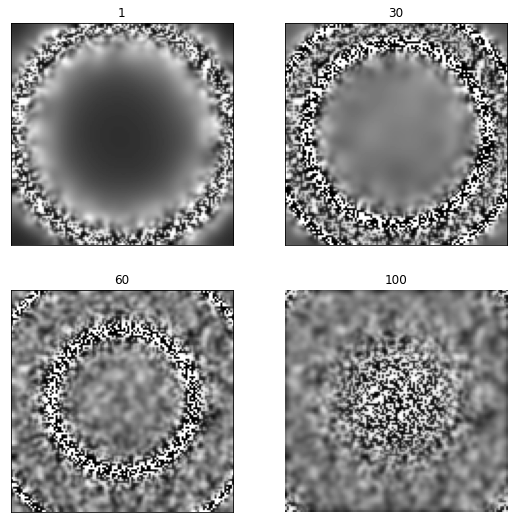

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])

ax1.imshow(frames[1], 'gray')
ax1.title.set_text('1')
ax2.imshow(frames[30], 'gray')
ax2.title.set_text('30')
ax3.imshow(frames[60], 'gray')
ax3.title.set_text('60')
ax4.imshow(frames[100], 'gray')
ax4.title.set_text('100')

plt.axis('off')
plt.show()   

## Create Laplacian Kernel

In [4]:
ly = np.array([[0,  1, 0], 
               [0, -2, 0], 
               [0,  1, 0]])
lx = np.array([[0,  0, 0], 
               [1, -2, 1], 
               [0,  0, 0]])

In [5]:
def zero_padding (img,N):
    [x,y] = np.shape(img)
    zero_padded_img = np.zeros((x+2*N,y+2*N))
    zero_padded_img[N:-N,N:-N] = img
    return zero_padded_img

In [6]:
def convolution(img,kernel):
    [x,y] = np.shape(img)
    w = len(kernel)
    d = w//2
    if d==0:
        convolved_image = kernel*img
    else:
        convolved_image = np.zeros((x-2*d, y-2*d))
        for i in range(d, x-d):
            for j in range(d, y-d):
                patch = img[i-d:i+d+1, j-d:j+d+1]
                convolved_image[i-d, j-d] = np.sum(patch*kernel)
    return convolved_image

## Modified Laplacian
Modified Laplacian of an image can be given as $ML = |I_xx| + |I

In [7]:
def Modified_Laplacian (img,N):
    if N!=0:
        img = zero_padding(img,N)
    Ixx = convolution(img,lx)
    Iyy = convolution(img,ly)
    ML_I = np.abs(Ixx) + np.abs(Iyy)
    return ML_I

## Sum Modified Laplacian
Sum Modified Laplacian for a pixel sums the ML values in an immediate neighbourhood described by a window size.

In [13]:
def Sum_Modified_Laplacian (img,N):
    [x,y] = np.shape(img)
    padded_image = zero_padding(img,N+1)
    SML = np.zeros((x,y))
    ML_I = Modified_Laplacian(padded_image,N)
    if N==0:
        SML = ML_I
    else:
        for i in range (x):
            for j in range (y):
                for m in range (i+1,i+2*N+2):
                    for n in range (j+1,j+2*N+2):
                        SML[i,j] += ML_I[m,n]
    return SML

In [14]:
SML_for_N = {}
in_focus_frame = {}
depth_map = {}
[x,y] = np.shape(frames[1])
N_values = [0,1,2]
for i in (N_values):
    SML_stack = np.zeros((x,y,num_frames))
    for j in range(num_frames):
        img = frames[j+1]
        SML_stack[:,:,j] = Sum_Modified_Laplacian(img,i)
    SML_for_N[i] = SML_stack
    in_focus_frame[i] = np.argmax(SML_stack, axis=2)
    depth_map[i] = in_focus_frame[i]*del_d

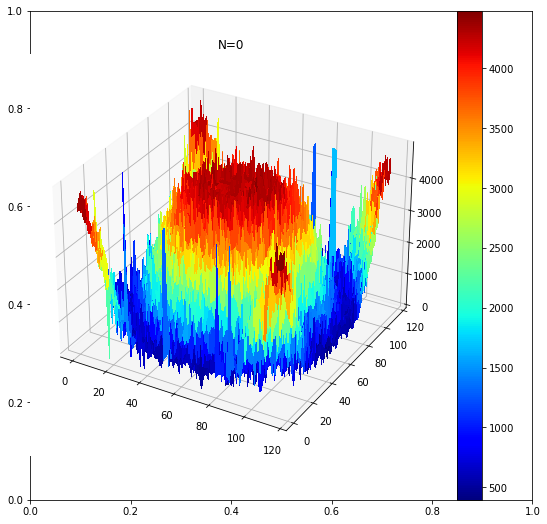

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
x, y = np.shape(frames[1])
X, Y = np.meshgrid(np.arange(x)+1, np.arange(y)+1)
surf = ax.plot_surface(X, Y, depth_map[0], cmap=cm.jet, linewidth=0, antialiased=False)
plt.title('N=0')
fig.colorbar(surf)
plt.show()

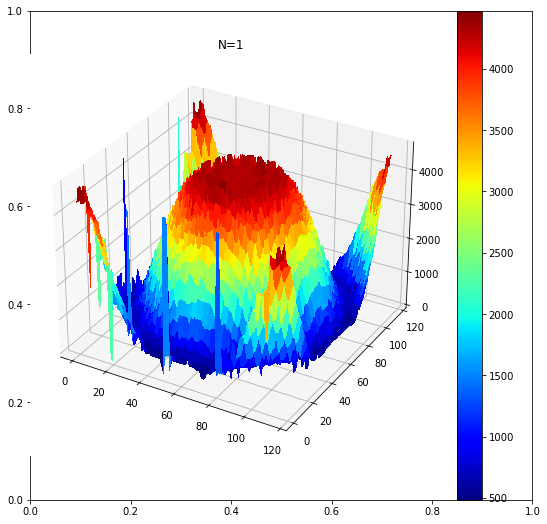

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
x, y = np.shape(frames[1])
X, Y = np.meshgrid(np.arange(x)+1, np.arange(y)+1)
surf = ax.plot_surface(X, Y, depth_map[1], cmap=cm.jet, linewidth=0, antialiased=False)
plt.title('N=1')
fig.colorbar(surf)
plt.show()

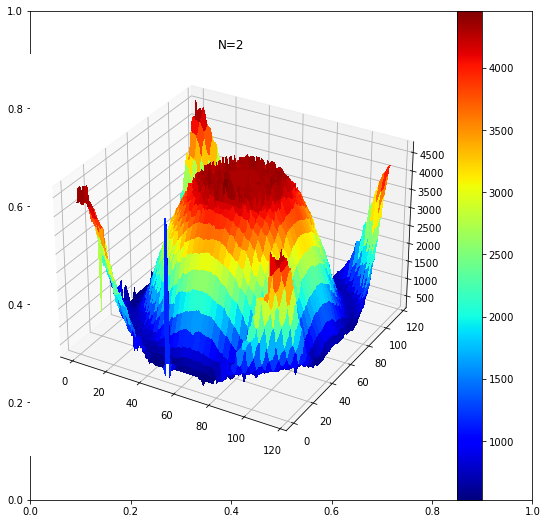

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
x, y = np.shape(frames[1])
X, Y = np.meshgrid(np.arange(x)+1, np.arange(y)+1)
surf = ax.plot_surface(X, Y, depth_map[2], cmap=cm.jet, linewidth=0, antialiased=False)
plt.title('N=2')
fig.colorbar(surf)
plt.show()